# Sky image generation using atmospheric scattering

In this notebook I will show you a way to calculate the colors of the sky. For this purpose, we will have to understand how light behaves with the earth's atmosphere.

When light travels from the sun to your eyes, it interacts with atmospheric particles. Some of those particles are small compared to the wavelength of the light, others are about the same size or bigger. In any case, these particles will scatter the light, changing its direction and its intensity. The intensity of the light that reaches your eyes is a result of a cascade of scattering events, changing the initial intensity of the light over and over again.

Ultimately what we want to calculate is a matrix of pixels and the intensity of Red, Green and Blue - RGB - light at each pixel - this is our image!. This intensity will be calculated by scattering equations.

This notebook essencialy has 2 parts: first there is a mild theoretical introduction to the topic which is recommended if you want to have a good idea of what we are actually doing; secondly the python implementation will also be provided and thoroughly explained.

By the end, you will hopefully understand and be able to write the code for how to generate an image like this:

![](./Imagens/sky.png)

## What is light scattering?

Putting it simply, some atmospheric molecules absorb incoming light and re-emit it in different directions, changing its intensity. You can think in your head that each molecule deflects the light, or even that light reflects off of it - even though it is a bit trickier than that. 

The most important thing is that light changes its direction and its intensity in these interactions. These two parameters are what we will be exploiting in our calculations.

We will overview and take advantage of two different types of scattering: Rayleigh and Mie scattering.

## Rayleigh scattering:

Rayleigh scattering happens when light interacts with particles smaller than its wavelength.
Its intensity is described by the following equations:

$$ I = I_0 \beta_R(\lambda) \gamma_R(\theta) \rho_R(h) $$

$$ \beta_R (\lambda) = \frac{8 \pi^3}{3N} \frac{(n^2 - 1)^2}{\lambda^4}, N = 2.504 \cdot 10^{25} $$

### Needed libraries

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

## Some helpful plots to understand scattering events

### Dependency of Rayleigh scattering with wavelength

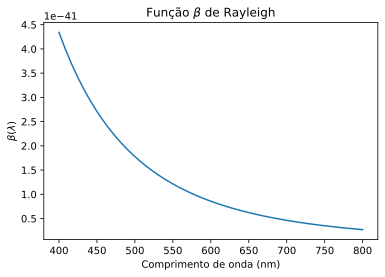

In [8]:
wavs = np.linspace(400, 800)
beta = lambda w: (8 / (3 * 2.504e25)) * (np.pi ** 3) * (1.00029 ** 2 - 1) ** 2 * (1/w**4)

plt.title("Função $\\beta$ de Rayleigh")
plt.plot(wavs, [beta(w) for w in wavs])
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("$ \\beta (\\lambda)$")
plt.savefig("BetaRayleigh.png", dpi=1000)
plt.show()

### Rayleigh phase function

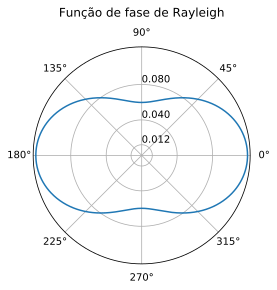

In [38]:
theta = np.linspace(0, 2*np.pi, 1000)
phase = lambda theta: (3 / (16*np.pi)) * (1 + (np.cos(theta)) ** 2)

ax = plt.subplot(111, projection='polar')
ax.set_title("Função de fase de Rayleigh\n")
ax.plot(theta, [phase(t) for t in theta])
ax.set_rticks([0.04, 0.08, 0.012])
ax.set_rlabel_position(90)
plt.savefig("RayleighPhase.png", dpi=1000)
plt.show()

### Cornette phase function

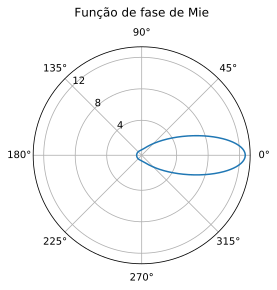

In [31]:
theta = np.linspace(0, 2*np.pi, 1000)
cornette = lambda angle, g: 1.5 * ((1 - g ** 2) / (2 + g ** 2)) * (1 + (np.cos(angle)) ** 2) / ((1 + g ** 2 - 2 * g * np.cos(angle)) ** 1.5)

ax = plt.subplot(111, projection='polar')
ax.plot(theta, [cornette(t, 0.6) for t in theta])
ax.set_rticks([4, 8, 12])
ax.set_rlabel_position(135)
ax.set_title("Função de fase de Mie\n")
plt.savefig("MiePhase.png", dpi=1000)
plt.show()